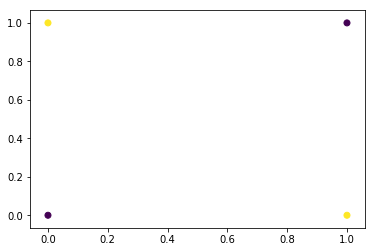

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
D = 2

# XOR inputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Output of the XOR
T = np.array([0, 1, 1, 0])

ones = np.array([[1] * N]).T

plt.scatter(X[:, 0], X[:, 1], c=T)
plt.show()

Trick: Insert a dimension to our input... turn it into a 3d problem instead of a 2D problem

In [3]:
# If we mulitple the X and Y into a new variable,
#    we can make the data linearly separable.

# Logistic regression may not be good for this because
#    a straight line pass through this?

# Wait a minute and check this out:
ones = np.array([[1] * N]).T

# The trick: Creating yet another column that represents
#    the radius of the points
r = np.zeros((N,1))
for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))
    
    
Xb = np.concatenate((ones, r, X), axis=1)

w = np.random.rand(D + 2)

z = Xb.dot(w)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy2(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

Y = sigmoid(z)

learning_rate = 0.001
error = []
epochs = 5000
for i in range(epochs):
    e = cross_entropy2(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(e)
        
    w += learning_rate * (np.dot((T - Y).T, Xb) - 0.01 * w)
    
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error)
plt.title('Cross-entropy per iteration')

cr = 1 - np.abs(T - np.round(Y)).sum() / N
print("Final w:", w, "epochs =", epochs, "Classification rate", cr)

4.68911104121
4.2275396254
3.84183296459
3.5344957415
3.30135774834
3.13246598787
3.01474875697
2.93497665942
2.88177716016
2.84640233804
2.82261912106
2.80621286639
2.79443311236
2.78552737796
2.7783969386
2.77236043287
2.76699845375
2.76205414573
2.7573707439
2.752852785
2.74844220993
2.74410372134
2.73981584656
2.73556549795
2.73134466864
2.72714842858
2.72297371052
2.71881857527
2.71468176737
2.71056244648
2.70646002517
2.70237407091
2.69830424696
2.69425027658
2.6902119215
2.68618896883
2.68218122311
2.67818850153
2.67421063093
2.67024744591
2.6662987877
2.66236450337
2.65844444524
2.65453847057
2.65064644121
2.64676822337
2.64290368741
2.63905270765
2.63521516221
2.63139093283
Final w: [-0.35653409  0.5884802  -0.13126088 -0.09313561] epochs = 5000 Classification rate 0.75


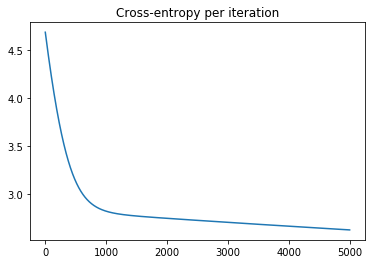

In [4]:
# Notice how the classification rate isn't perfect, 
#     even though it could be
plt.show()

In [8]:
# One could try 
# - iterate more times
# - increase learning rate.

# Let's try this

# If we mulitple the X and Y into a new variable,
#    we can make the data linearly separable.

# Logistic regression may not be good for this because
#    a straight line pass through this?

# Wait a minute and check this out:
ones = np.array([[1] * N]).T

# The trick: Creating yet another column that represents
#    the radius of the points
r = np.zeros((N,1))
for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))
    
    
Xb = np.concatenate((ones, r, X), axis=1)

w_orig = np.random.rand(D + 2)

def doWeightLearning(w, Xb, T, alpha, num_epochs):
    z = Xb.dot(w)
    Y = sigmoid(z)

    # learning_rate = 0.001 #Replaced by alpha
    
    error = []
    # epochs = 5000 # Replaced by num_epochs
    for i in range(num_epochs):
        e = cross_entropy2(T, Y)
        error.append(e)
        w += learning_rate * (np.dot((T - Y).T, Xb) - 0.01 * w)
        Y = sigmoid(Xb.dot(w))

    plt.plot(error)
    plt.title('Cross-entropy per iteration')
    plt.show()

    cr = 1 - np.abs(T - np.round(Y)).sum() / N
    print("Final w:", w, "epochs =", num_epochs, "Classification rate", cr)

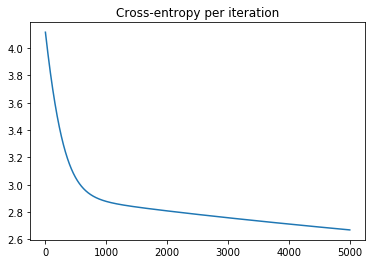

Final w: [-0.21284393  0.40670055 -0.03513931 -0.11352628] epochs = 5000 Classification rate 0.75


In [9]:
w = w_orig[:]
# Baseline
doWeightLearning(w, Xb, T, alpha=0.001, num_epochs=5000)

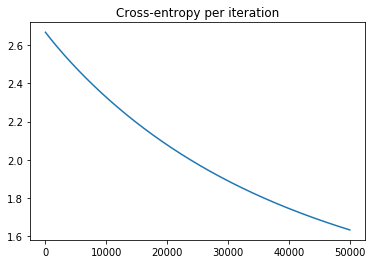

Final w: [-0.95223349  4.76380086 -3.10156979 -3.10157015] epochs = 50000 Classification rate 1.0


In [10]:
w = w_orig[:]
# Iterate more times
doWeightLearning(w, Xb, T, alpha=0.001, num_epochs=50000)
# Worked

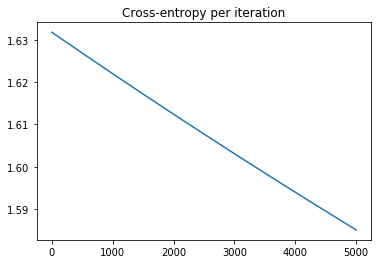

Final w: [-0.98388598  5.00331573 -3.27455894 -3.27455905] epochs = 5000 Classification rate 1.0


In [11]:
w = w_orig[:]
# Increase learning rate
doWeightLearning(w, Xb, T, alpha=0.01, num_epochs=5000)
# Worked

- We saw that we could apply Logistic Regression to some complex problems by creating our own features.
- We looked at the data, saw what kind of features would help aid classification.
- Neural Networks can do this automatically.